<a href="https://colab.research.google.com/github/sylviahamidah/Unsupervised-Learning/blob/main/1.%20K-Means%20and%20K-Means%2B%2B/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/training_arr.txt"

'/content/drive/My Drive/Colab Notebooks/training_arr.txt'


## Load Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
filename = '/content/drive/My Drive/Colab Notebooks/training_arr.txt'
data = np.loadtxt(filename, delimiter=' ', dtype=float, skiprows=1, usecols=(1, 2))
print("First five elements of data are:\n", data[:5]) 
print('The shape of X is:', data.shape)

First five elements of data are:
 [[ 0.93 88.2 ]
 [ 0.86 87.14]
 [ 0.83 89.55]
 [ 0.96 91.67]
 [ 0.94 91.65]]
The shape of X is: (7800, 2)


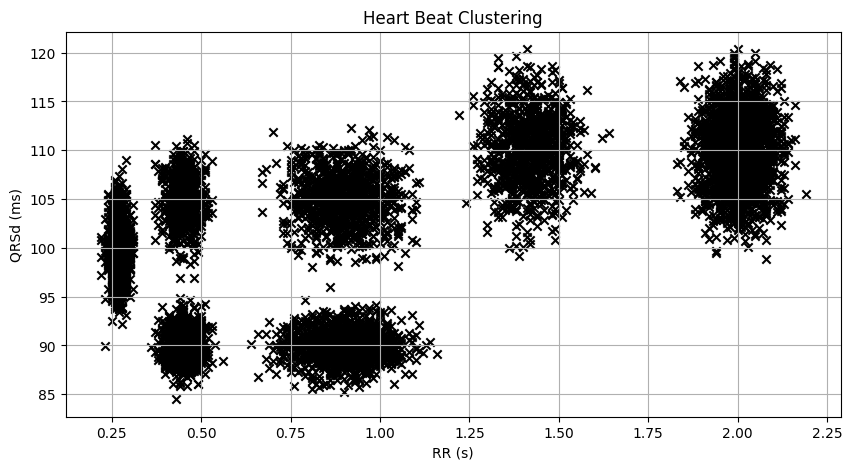

In [5]:
x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='black', marker='x')
plt.xlabel('RR (s)')
plt.ylabel('QRSd (ms)')
plt.title('Heart Beat Clustering')
plt.grid(True)
plt.show()

## K-Means++ From Scratch

In [6]:
def load_data():
    X = np.load("data/ex7_X.npy")
    return X

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [7]:
def find_closest_centroids(X, centroids):
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance) 
        
    
    return idx

In [8]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[0.25,100], [0.5,90], [0.5,105], [0.75, 100], [0.75,105], [1.5, 110], [2, 110]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(data, initial_centroids)

# Print closest centroids for the first seven elements
print("First three elements in idx are:", idx[:7])


First three elements in idx are: [1 1 1 1 1 1 1]


In [9]:
def compute_centroids(X, idx, K):
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [10]:
K = 7
centroids = compute_centroids(data, idx, K)

print("The centroids are:", centroids)


The centroids are: [[  0.28415572  99.56045966]
 [  0.70293924  90.04277909]
 [  0.39389694 104.60808374]
 [  1.11954082 101.14923469]
 [  1.36499175 105.35189769]
 [  1.24145144 110.78582711]
 [  2.00137386 111.35043769]]


In [11]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


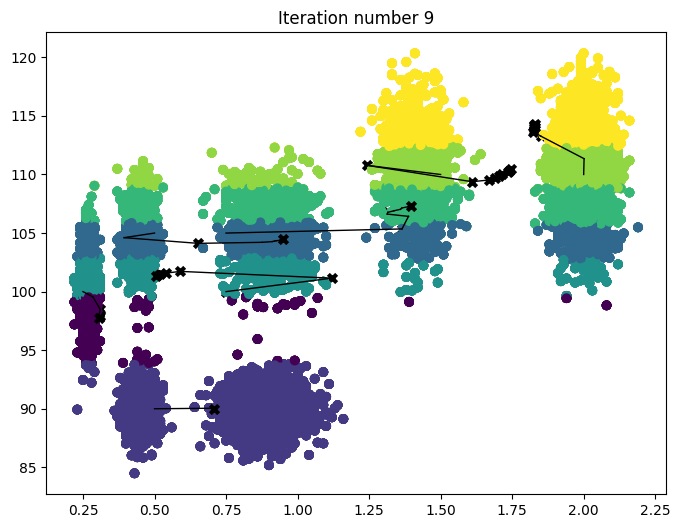

In [12]:
# Set initial centroids
initial_centroids = np.array([[0.25,100], [0.5,90], [0.5,105], [0.75, 100], [0.75,105], [1.5, 110], [2, 110]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(data, initial_centroids, max_iters, plot_progress=True)

##K-Means with Scikit-Learn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
df = pd.DataFrame(data)
df = df.rename(columns={0: 'RR (s)'})
df = df.rename(columns={1: 'QRSd (ms)'})

df.head()

# Print the dataframe to verify the c

,RR (s),QRSd (ms)
0,0.93,88.20
1,0.86,87.14
2,0.83,89.55
3,0.96,91.67
4,0.94,91.65


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [16]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (10, 5))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

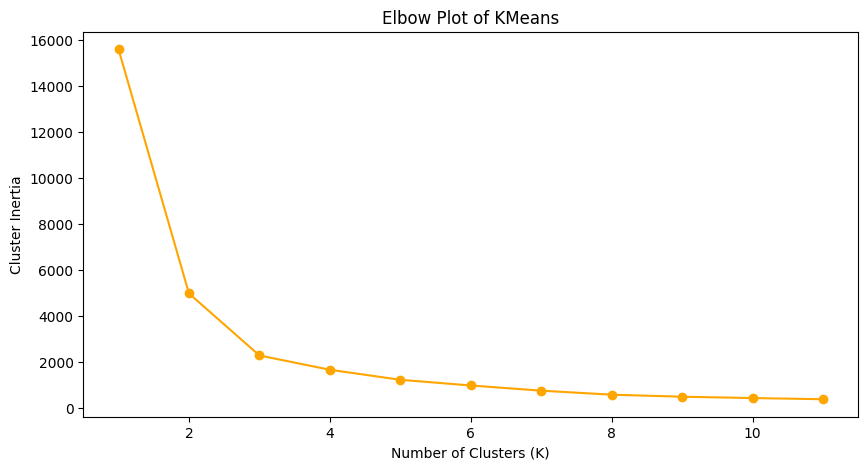

In [18]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [19]:
kmeans_model = KMeans(n_clusters = 7)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [20]:
df["clusters"] = kmeans_model.labels_
df.head()

,RR (s),QRSd (ms),clusters
0,0.93,88.20,3
1,0.86,87.14,3
2,0.83,89.55,3
3,0.96,91.67,3
4,0.94,91.65,3


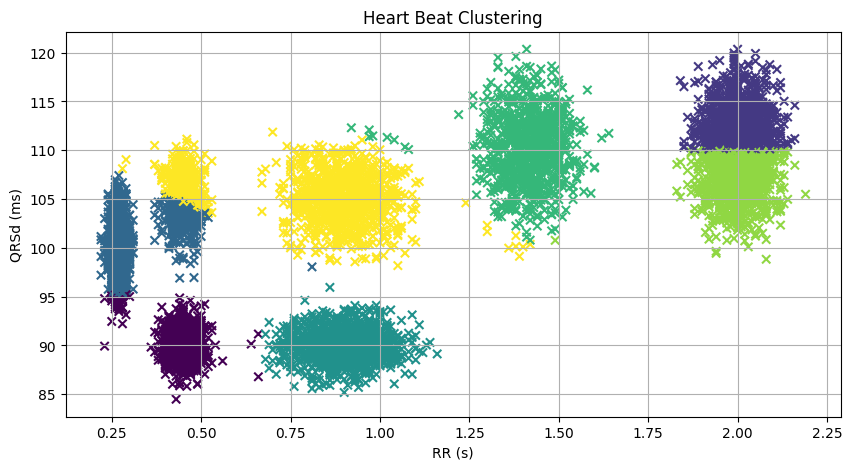

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['RR (s)'], df['QRSd (ms)'], c = df["clusters"], marker='x')
plt.xlabel('RR (s)')
plt.ylabel('QRSd (ms)')
plt.title('Heart Beat Clustering')
plt.grid(True)
plt.show()